In [1]:
from agents.td3_agent import TD3Agent
import gymnasium as gym
import torch
from matplotlib import pyplot as plt
import numpy as np 

/Users/felix/opt/anaconda3/envs/Gym-RL/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env = gym.make('Pendulum-v1', g=9.81)
input_dim = env.observation_space.shape[0]
n_actions = env.action_space.shape[0]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [3]:
agent = TD3Agent(lr_critic=3e-4,
            lr_actor=3e-4,
            gamma=0.99,
            input_dim=input_dim,
            tau=0.005,
            n_actions=n_actions,
            max_buffer_size=50_000,
            batch_size=256,
            update_actor_interval=2,
            explore_n_times=1_000,
            noise=0.1,
            device=device)

In [4]:
agent.load_agent('models/pendulum/', 500)

Loading agent from models/pendulum/00000500/ ...


In [5]:
# visualize the agent play
env = gym.make('Pendulum-v1', render_mode="human")
obs, _ = env.reset()
env.render()

In [6]:
for _ in range(300):
    action = agent.remote_act(obs)
    obs, reward, done, _, info = env.step(action)
    env.render()
env.close()

In [7]:
env.close()

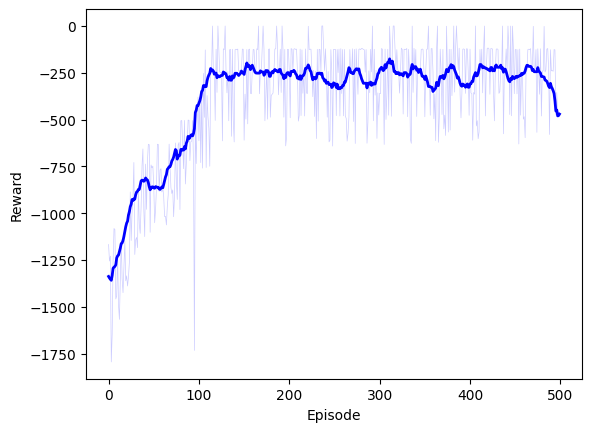

In [10]:
# visualize the reward of the agent
reward = np.load('results_csv/td3/reward_history_pendulum.npy')
plt.plot(reward, alpha=0.2, color='blue', linewidth=0.5)
# smooth the reward
smoothed_reward = []
for i in range(0, len(reward), 1):
    smoothed_reward.append(np.mean(reward[i:i+20]))
plt.plot(smoothed_reward, color='blue', linewidth=2.0)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()